In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [7]:
def generate_xvals(start, stop, num_steps):
    #generates x value basis
    step=(stop-start)/num_steps
    return np.arange(start, stop, step)

In [8]:
def findRoots(start, stop, npoints, nsearch, func):
    """Takes a starting x point, stopping x point, 
    number of points, size of search slices, and function to find roots of.
    Returns x-values of roots, y-values (zeros), time elapsed, and number of 
    roots."""
    tic=time.time()
    xvals=generate_xvals(start, stop, npoints)
    yvals=func(xvals)

    niter=int(npoints/nsearch)
    
    xroots=[]
    yroots=[]
    
    num_roots=0
    
    y0=yvals[0]
    
    for i in np.arange(0, niter, 1):
        xi=xvals[i*nsearch]
        yi=yvals[i*nsearch]
        
        if(yi==0):
            xroots.append(xi)
            yroots.append(yi)
            
            num_roots=num_roots+1
            
        elif(y0*yi<0.0):
            tolerance=1.0E-10
            diff=1
            
            xlow=xvals[nsearch*(i-1)]
            xhigh=xvals[nsearch*i]
            
            while diff>tolerance:
                xmid=(xhigh+xlow)/2.0
                
                ylow=func(xlow)
                ymid=func(xmid)
                
                if(ylow*ymid<0):
                    xhigh=xmid
                else:
                    xlow=xmid
                    
                diff=np.abs(ymid)
                    
            num_roots=num_roots+1
            
            xroots.append(xmid)
            yroots.append(func(xmid))
            y0=yi
        else:
            y0=yi
            
    tok=time.time()
    telapse=tok-tic
    
    return xroots, yroots, telapse, num_roots

Question 1
a) Calculate the roots of the polynomial $f(x)=1.80-4.05x+0.40x^2+x^3$

In [9]:
def funcA(x):
    return 1.80-4.05*x+0.40*x**2+x**3

xroots, yroots, timechange, num_roots=findRoots(-4.0, 4.0, 10000, 1000, funcA)

print(str(num_roots)+" roots:")
for i in xroots:
    print("Root at %f\n" % i)
print("Time Elapsed:" +str(timechange)d+"s")

3 roots:
Root at -2.400000

Root at 0.500000

Root at 1.500000

Time Elapsed:0.0010209083557128906


1b) Create a plot of the time take to find the roots vs. sparsification size, for n_search values between 1 and 10,000.

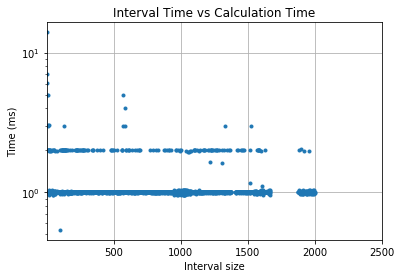

In [10]:
nsearch_basis=np.arange(1, 10000)
nroots_expected=3

nsearch_vals=[]
time_vals=[]

for i in nsearch_basis:
    null,null,timeElapse,num_roots=findRoots(-4.0, 4.0, 10000, i, funcA)
    if(num_roots==nroots_expected):
        time_vals.append(1000.0*timeElapse)
        nsearch_vals.append(i)
    
fig, axs = plt.subplots(nrows=1, ncols=1)

plt.yscale('log')
axs.plot(nsearch_vals, time_vals,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
axs.set_xlim(1,2500)
plt.title("Interval Size vs Calculation Time")
plt.show()

1c) Deduce the source of the various patterns that you observe in part b).

Changing n_search affects the size of the slice the program uses to search. Starting with 1, the program takes longer because it is searching through all points in defined in the x-axis. As the slice becomes larger, there is a risk that the sign of the function will change, then change back within one slice, which means it will go unnoticed by the program. Results which do not return the full number of expected roots are discarded. There is a gap between ~1700 and ~1900 where the slicing excludes the data points. In addition, above ~2000 the program is unable to capture all the roots. 

d) Modify the code created in part a) to allow for the possibility to find the roots of other poynomials or functions

In [13]:
def customFunction(x):
    #custom functions can be entered here
    return np.cos(x)+np.sin(x)

xroots, yroots, telapse, num_roots=findRoots(-4.0, 4.0, 10000, 1000, customFunction)
print(str(num_roots)+" roots:")
for i in xroots:
    print("Root at %f\n" % i)

3 roots:
Root at -3.926991

Root at -0.785398

Root at 2.356194

